<a href="https://colab.research.google.com/github/j1ayizhao/datascienceA2/blob/main/JiayZhaoU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

In [1]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.

In [2]:
import preliz as pz

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

## Context

For my project I am trying to find the true amount of food businesses that open per month, specifically post covid time. The pandemic was especially devastating on the restaurant industry, many food businesses could no longer feasibly operate due to safety concerns and how customers generally changed their eating out habits. I'm interested in investigating how much the food industry was able to bounce back in post-covid years in terms of new business openings.

## Likelihood

I collected data from the Yelp website which displayed the number of monthly new food business listings on their website. I took my data from the time frame Feb 2021 - Dec 2023 to get a total of 34 data points.

In [4]:
url_businesses = 'https://raw.githubusercontent.com/j1ayizhao/datascienceA2/refs/heads/main/Copy%20of%20foodbusiness%20data!!!%20-%20Sheet1.csv'
data_businesses = pd.read_csv(url_businesses)

In [5]:
data_businesses

,2810
0,3511
1,3099
2,3473
3,3750
4,3800
5,3541
6,3034
7,3099
8,2757
9,2636


(array([2., 2., 5., 2., 8., 3., 6., 2., 3., 1.]),
 array([2636. , 2819.3, 3002.6, 3185.9, 3369.2, 3552.5, 3735.8, 3919.1,
        4102.4, 4285.7, 4469. ]),
 <BarContainer object of 10 artists>)

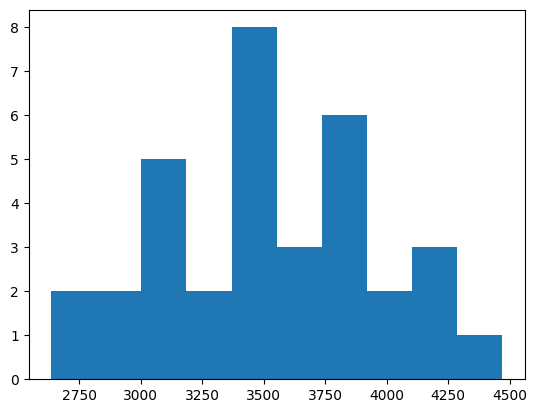

In [6]:
plt.hist(data_businesses)

## Prior

For my priors, I used an uniform distribution and a half normal distribution, because I know my data contains only positive real numbers and the standard deviation is always positive. From my histogram, I estimated my data has a standard deviation of 300 and used that in my half normal distribution

<Axes: >

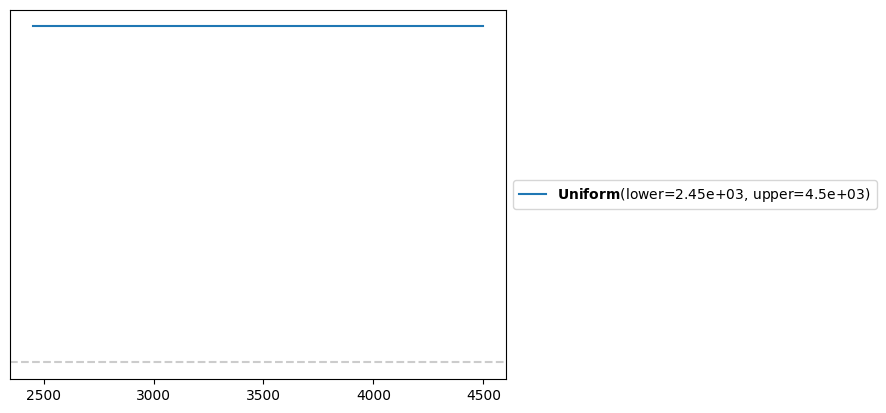

In [ ]:
pz.Uniform(2450, 4500).plot_pdf()

<Axes: >

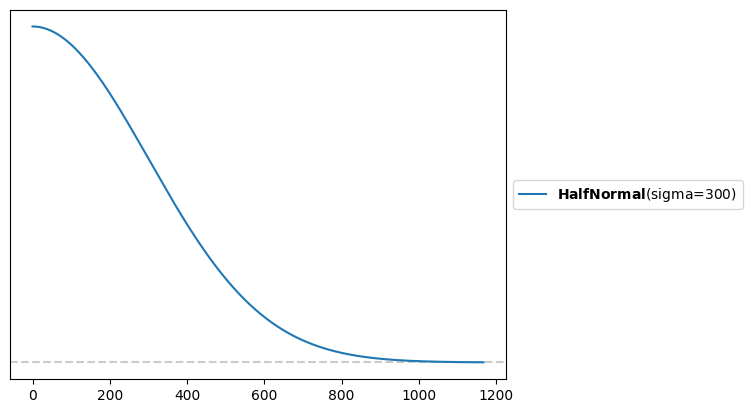

In [11]:
pz.HalfNormal(sigma = 300).plot_pdf()

## Posterior

In [12]:
with pm.Model() as model_businesses:
  μ = pm.Uniform('μ', lower=2450, upper=4500)
  σ = pm.HalfNormal('σ', sigma=300)
  Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_businesses)
  idata_businesses = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

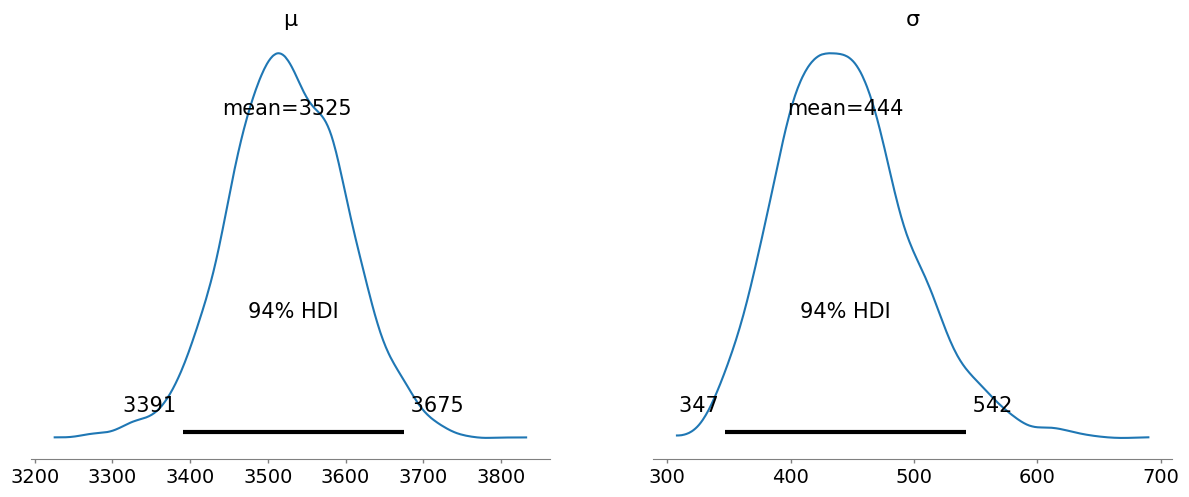

In [13]:
az.plot_posterior(idata_businesses)

## Posterior Predictive Check

I used a normal distribution likelihood for my posterior predictive check because that is the shape my histogram showed, and the model matches my data fairly well, so I didn't think it was necessary to make further models with a skew or T distribution because my data is just a normal shape

In [14]:
pm.sample_posterior_predictive(idata_businesses, model=model_businesses, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

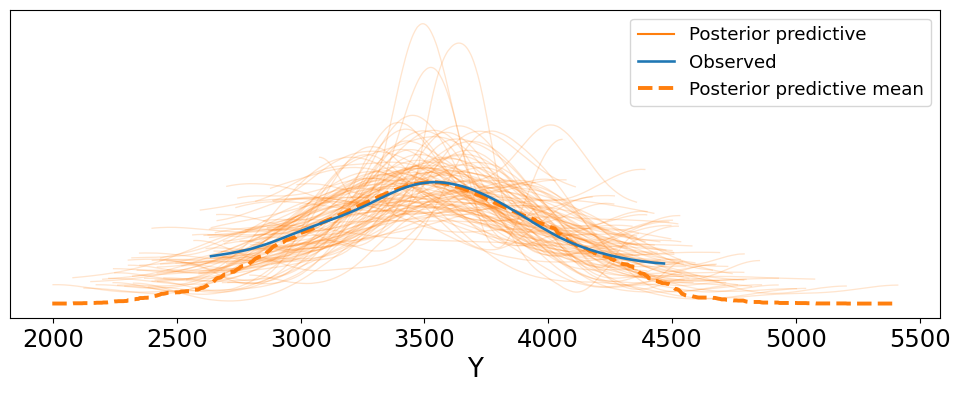

In [15]:
az.plot_ppc(idata_businesses, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

## Conclusion

My data is not an accurate representation of reality, as it was taken from listings on the Yelp website, meaning that it definitely underestimates the true amount of food businesses that have opened post-covid in the US; but it is still helpful in creating a recognizable pattern that we could make predictions off of about reality.

My data set and model are both normally distributed, meaning that the amount of openings have been relatively stable over the past two years, without remarkable trends in growth and recession. The model could also be useful because any outliers would be extremely easy to spot, so if a month had an abnormal number of openings we could identify it and could allow for investigation of external factors that could have caused it.